# Molecular Visualisation Toolkit 🎨🧬

*General Chemistry & Cyberinfrastructure Skills Module*

## Learning Objective
Construct and **distinguish** between different molecular visualisations, including (but not limited to):
- **Ball‑and‑stick**
- **Space‑filling** (CPK)
- **Line / wireframe**
- **2‑D line drawing**
- **Electron‑cloud / VDW surface**

## Prerequisites
- Python ≥ 3.8
- **RDKit** for molecule parsing & 2‑D depictions
- **py3Dmol** for interactive 3‑D

On Google Colab, run the install cell below first.

In [1]:
# !pip install rdkit-pypi py3Dmol -q   # ← Uncomment if needed

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import rdMolDraw2D
try:
    import py3Dmol
except ModuleNotFoundError:
    raise ModuleNotFoundError('Install py3Dmol to use this notebook!')

In [2]:
def embed_3d(mol):
    """Return a 3‑D conformation using RDKit ETKDG and UFF optimise."""
    m = Chem.AddHs(Chem.Mol(mol))
    AllChem.EmbedMolecule(m, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(m)
    return m

def view_style(mol3d, style='stick'):
    """Show *mol3d* (with 3‑D coords) in chosen *style*."""
    block = Chem.MolToMolBlock(mol3d)
    v = py3Dmol.view(width=400, height=300)
    v.addModel(block, 'mol')
    if style == 'surface':
        v.setStyle({'stick':{'radius':0.15}})
        v.addSurface(py3Dmol.VDW, {'opacity':0.7, 'color':'0x99ccff'})
    else:
        v.setStyle({style:{}})
    v.zoomTo()
    return v.show()


## Visualisation Styles at a Glance
| Style | What it emphasises | Typical use |
|-------|--------------------|--------------|
| **Line / wireframe** | Connectivity (bonds), fastest to render | quick sketches, large biomolecules |
| **Ball‑and‑stick** | Both atoms (balls) and bonds (sticks); shows angles | teaching geometry |
| **Space‑filling (CPK)** | Atomic radii & overall molecular shape | packing, docking visualisation |
| **Electron cloud / VDW surface** | Approx. electron density; cavities & pockets | reactivity, protein‑ligand fits |
| **2‑D depiction** | Flat schematic | reports, publications |

## Worked Example — Caffeine ☕
We’ll generate 2‑D and 3‑D views in multiple styles.

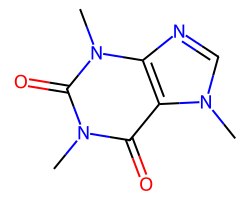

In [3]:
caffeine = Chem.MolFromSmiles('Cn1cnc2c1c(=O)n(C)c(=O)n2C')
caff3d = embed_3d(caffeine)

# 2‑D depiction
Draw.MolToImage(caffeine, size=(250, 200))

In [4]:
# Ball‑and‑stick
view_style(caff3d, 'stick')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
# Space‑filling (CPK)
view_style(caff3d, 'sphere')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# Wireframe / line
view_style(caff3d, 'line')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
# Electron cloud (VDW surface) + thin sticks for reference
view_style(caff3d, 'surface')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Your Turn 📝
1. Pick **two** molecules of interest (size ≤ 80 atoms recommended).  
2. Generate **all four** representations for each.  
3. Briefly note which visualisation you find most informative and **why**.

*(Hint: Re‑use the helper `embed_3d` and `view_style`.)*


Molecule: CCO


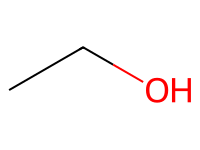

— stick


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

— sphere


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

— line


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

— surface


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


Molecule: O=C=O


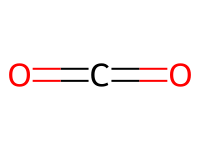

— stick


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

— sphere


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

— line


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

— surface


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
# TODO 1: Replace with your own SMILES list
my_smiles = ['CCO', 'O=C=O']  # ethanol, CO2 – edit me!

for smi in my_smiles:
    mol = Chem.MolFromSmiles(smi)
    m3d = embed_3d(mol)
    print(f'\nMolecule: {smi}')
    # 2‑D
    display(Draw.MolToImage(mol, size=(200,150)))
    # 3‑D styles
    for sty in ['stick', 'sphere', 'line', 'surface']:
        print(f'— {sty}')
        view_style(m3d, sty)
    # TODO 2: Write your reflection here (markdown cell?)


### Challenge ⭐ — Side‑by‑side Grid
Write a function that renders a **2 × 2 grid** of the four 3‑D styles for a single molecule so you can compare them at a glance. *(Tip: py3Dmol supports creating multiple `view` objects and concatenating them in HTML.)*

In [9]:
# TODO 3: Implement side‑by‑side grid (optional)
def four_view_grid(mol3d):
    pass  # ← Your code here


## Summary & Next Steps
- Different visualisation styles highlight **different aspects** of molecular structure.  
- Knowing when to choose ball‑and‑stick vs space‑filling (for example) is a key part of scientific communication.  
- Experiment with colour schemes, surfaces (`addSurface` options in py3Dmol), and even **electrostatic potential maps** (requires cube files) to deepen your visual toolbox.